# 2025-2 INSIGHT 8차 교육세션 사전학습 과제
## 시계열2

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 1. 안정적 시계열 분석 </span>

### 1) AR, MA, ARMA 모델 개념

```
가장 기초가 되는 단변량(변수 1개) 시계열 모델 3종류

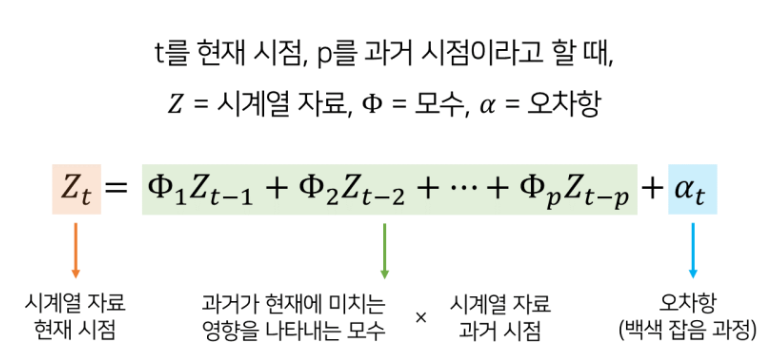

### 1. AR (자기회귀 모형)
- 개념: "오늘의 나는 어제의 나로부터 비롯된다." 현재의 상태가 과거의 자기 자신 상태에 의존한다고 가정함.
- 작동 원리: 현 시점의 데이터를 과거 데이터들의 가중합(Linear Combination)으로 설명함.
- 사례: 주식 시장의 관성 효과. 어제 주가가 올랐으면 그 여파로 오늘도 오를 가능성이 높다고 보는 것. 혹은 컵에 따뜻한 물을 부었을 때, 현재 온도는 직전 시간의 온드에 가장 큰 영향을 받는 것과 같음.

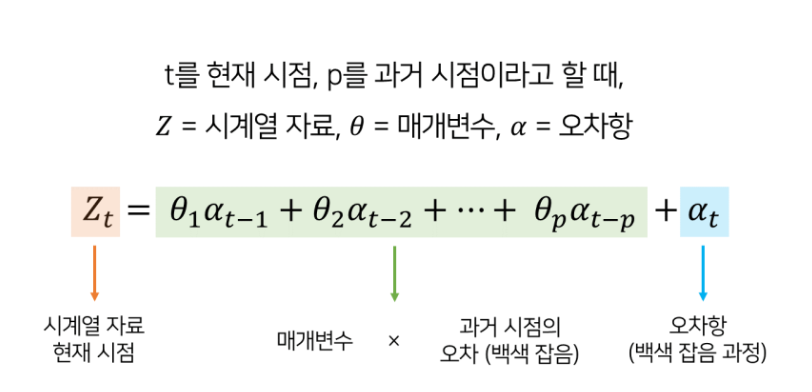

### 2. MA (이동 평균 모형)
- 개념: "오늘의 나는 과거에 겪은 충격(Error)들의 합이다." 현재의 데이터가 과거의 백색 잡음(White Noise, 예측 불가능한 오차)들의 결합으로 이루어진다고 봄.
 - 작동 원리: 데이터의 평균적인 흐름에서 벗어난 '깜짝 변동(Shock)'이 시간이 지남에 따라 어떻게 소멸되는지를 모델링함.
- 사례: 갑작스러운 스캔들 기사(Shock)가 떴을 때, 그 날은 주가가 급락하지만 며칠 지나면 그 충격이 희석되며 원래대로 돌아오는 과정.

### 3. ARMA (AutoRegressive Moving Average)
- 개념: AR과 MA를 합친 짬뽕 모델. 과거의 데이터(AR 성분)와 과거의 오차(MA 성분)를 모두 고려하여 현재를 설명함. 현실 데이터는 AR, MA 하나만으로 설명되지 않는 경우가 많이 때문에 이 둘을 적절히 배합해서 설명력을 높임.

```
필수 전제조건: 정상성과 가역성

> 이 모델들을 돌리기 위해 데이터가 갖춰야 할 기초 체력 같은 것!

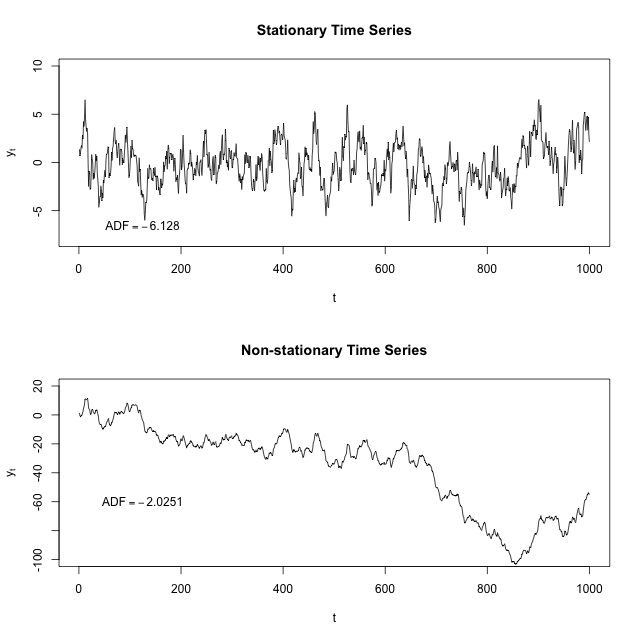

### - 정상성
  - 정의: 시계열의 확률적 성질(평균, 분산 등)이 시간이 흘러도 변하지 않는 성질
  - 왜 필요한가? 과거의 데이터 패턴이 미래에도 동일하게 유지된다는 가정이 있어야 예측이 가능하기 때문. 평균이 계속 변하거나(추세 존재), 변동폭이 갈수록 커지면(분산 비일정) 기존 공식으로 미래를 맞힐 수 없음.
  - 특징: 정상 시계열은 어떤 시점의 평균을 구해도 같고, 시차가 같다면 공분산도 같음.

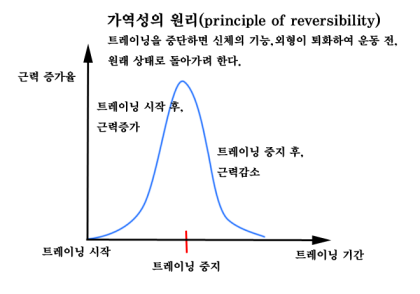

### - 가역성
  - 정의: 현재의 시계열 자료를 과거의 관측치들만의 합으로 표현할 수 있는 성질. (수식적으로는 MA 모형을 무한 차수의 AR 모형으로 변환 가능한 상태)
  - Why? : MA 모형의 식별 문제 때문. 같은 데이터 패턴을 만드는 MA 모형이 여러 개 존재할 수 있는데, 가역성 조건이 있어야 유일한 하나의 모델을 특정할 수 있음.

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 2. 차수 결정법 </span>

```
"그래서 과거 며칠 치를 봐야 하는데?" (p, q 값 정하기)

### 1. ACF와 PACF를 이용할 직관적 방법
그래프(Correlogram)를 그려서 상관관계가 뚝 끊기는 지점을 찾음.
<BR>
- ACF (AutoCorrelation Function, 자기상관함수): 시차(Lag)에 따른 자기 자신과의 상관관계. (직전 영향 + 간접 영향 모두 포함)
- ACF (AutoCorrelation Function, 자기상관함수): 시차(Lag)에 따른 자기 자신과의 상관관계. (직전 영향 + 간접 영향 모두 포함)

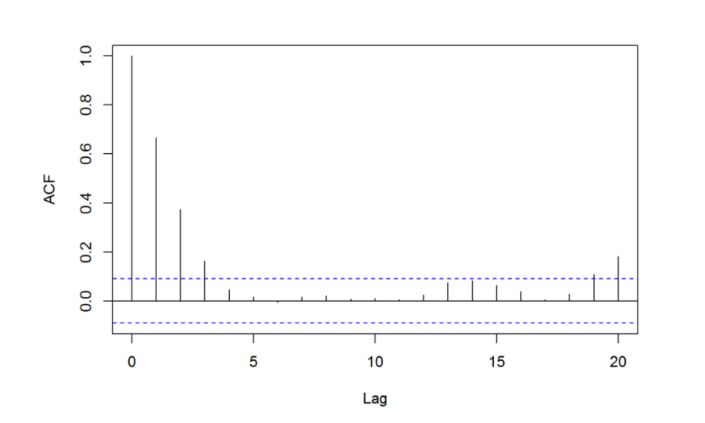

상기 그래프에서는 ARIMA 모델에서 MA 계수가 3개 (MA(3)) 필요할 것이라고 예상할 수 있다.

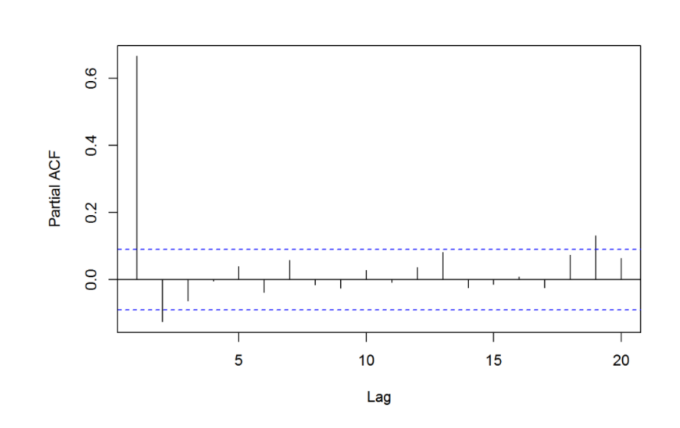

상기 그래프에서는 ARIMA 모델에서 AR 계수가 2개 (AR(2)) 필요할 것이라고 예상할 수 있다.

### 2. 정보 기준(AIC, BIC)을 이용한 수치적 방법

그래프가 애매할 때 사용하는 점수판. "모델은 정확할수록 좋지만, 변수가 너무 많으면 안 좋다"는 철학.
<BR>
- 원리: (모형의 적합도) - (페널티: 변수의 개수) : 즉, 설명력은 높이되 복잡도는 낮추는 것
- AIC (Akaike Information Criterion): 예측 정확도 중시.

- BIC (Bayesian Information Criterion): AIC보다 변수 개수에 더 큰 페널티를 줌. (더 심플한 모델 선호).

- 결론: 여러 모델(AR(1), AR(2), MA(1)...)을 다 돌려보고 AIC/BIC 값이 가장 작은(Minimum) 모델을 선택하면 됨.

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 3. 불안정 시계열 분석 </span>

```
현실 세계의 데이터(주가, GDP, 매출액 등)는 대부분 정상성을 만족하지 않기에 이를 해결하고자 불안정 시계열 분석을 함.

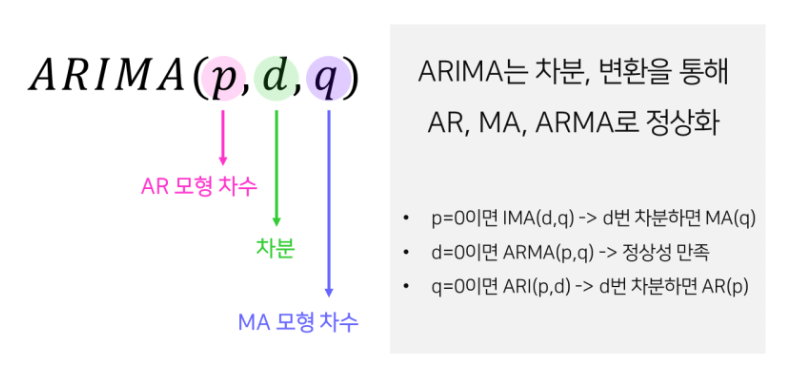

### 1. ARIMA
- 개념: 비정상 시계열을 차분해서 정상 시계열로 만든 뒤 ARMA를 적용하는 모델
- 차분: '오늘 데이터 - 어제 데이터'를 구하는 것
  - 매일 100원씩 오르는 주식이 있다면(비정상, 추세 있음), 차분하면 [100, 100, 100...]이 되어 평균이 일정한 정상 데이터가 됨.
- 구조: ARIMA(p, d, q). d번 차분해서 정상성을 확보한 후 AR(p), MA(q)를 수행함.

### 2. SARIMA
- 개념: ARIMA에 계절성을 추가한 모델. 데이터에 주기적인 패턴이 있을 때 사용.
- 사례: 아이스크림 매출(매년 여름마다 폭증), 전력 사용량(낮에 높고 밤에 낮음)
- 기존 ARIMA 파라미터(p,d,q)에 계절성 파라미터(P,D,Q)s를 추가로 설정해서 반복되는 주기를 학습함.

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 4. 다변량 시계열 분석 </span>

```
"세상은 혼자 돌아가지 않는다." 변수 하나만 보는 게 아니라 여러 변수의 상호작용을 분석함.

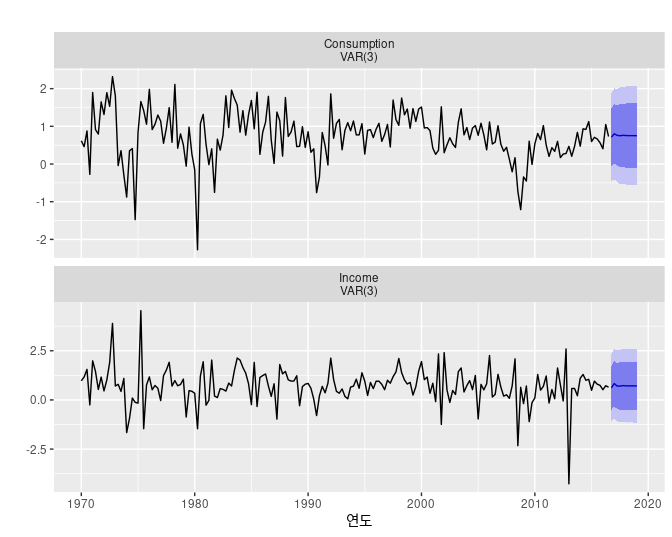

### VAR(벡터 자기회귀)

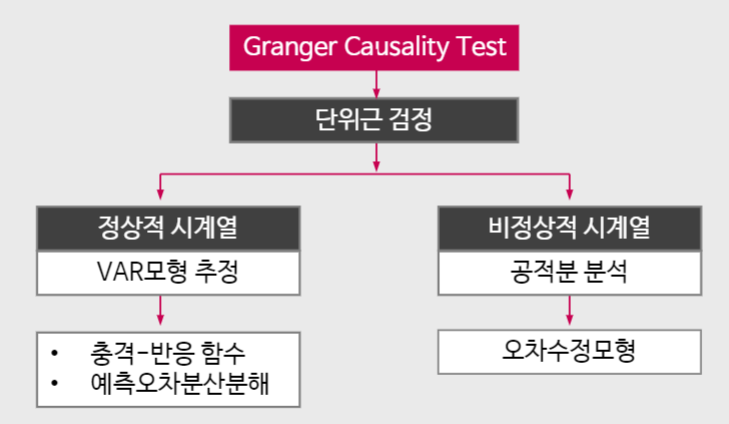

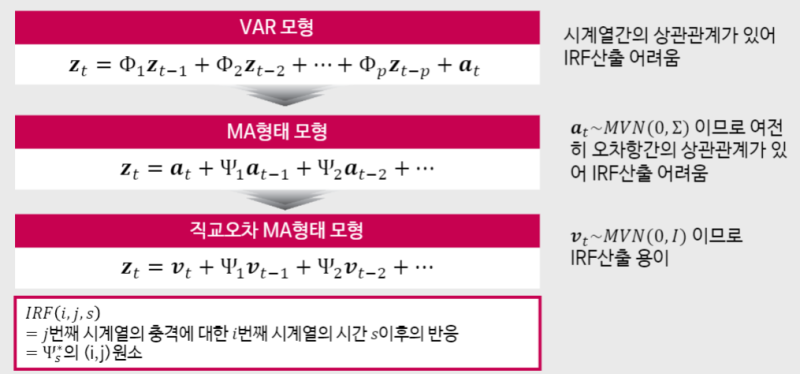

- 개념: 단변량 AR 모형을 다변량으로 확장한 것. 여러 개의 시계열 변수를 동시에 예측함.

- 특징: 모든 변수를 '내생변수'로 취급함. 즉, A가 B에 영향을 주고, B가 다시 A에 영향을 주는 쌍방향 피드백 관계를 모델링할 수 있음.

- 사례: [환율, 금리, 주가]의 관계.

    - 금리가 오르면 -> 주가가 떨어지고 -> 환율이 변동됨.

    - 다시 환율 변동이 -> 물가에 영향을 줘서 -> 금리 결정에 영향을 줌.

    - 이런 꼬리에 꼬리를 무는 인과관계를 분석할 때 VAR이 필수적임.

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 5. 시계열 딥러닝 </span>

```
전통적 통계 모델(ARIMA 등)은 선형적인 관계만 잘 보지만, 딥러닝은 비선형적이고 복잡한 패턴을 잡아냄.

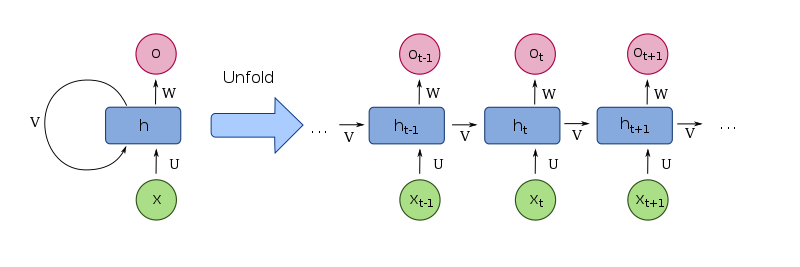

### 1. RNN
- 개념: 데이터를 순서대로(Time step별로) 입력받는 순환 신경망. 이전 단계의 연산 결과(Hidden State)가 다음 단계의 입력으로 들어감.
- 한계: 장기 의존성(Long-term Dependency) 문제. 시퀀스가 길어지면 앞쪽의 중요한 정보를 뒤쪽까지 전달하지 못하고 까먹음(Vanishing Gradient). 마치 긴 문장을 읽다가 앞부분 내용을 잊어버리는 것과 같음.

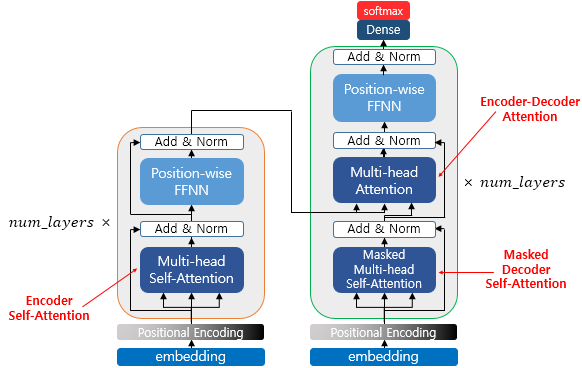

### 2. Attention & Transformer
- Attention: "중요한 건 크게 보자." RNN의 기억력 문제를 해결하기 위해 등장. 특정 시점을 예측할 때, 입력된 모든 시점의 데이터를 참고하되 연관성이 높은 시점에 더 큰 가중치(Attention Score)를 줌.
- Transformer: RNN을 아예 없애고 Attention만으로 구성한 모델.

    - 장점: 데이터를 순차적으로 넣지 않고 한꺼번에(병렬) 처리 가능 -> 학습 속도 빠름. 먼 과거의 정보도 다이렉트로 참고 가능해서 장기 패턴 학습에 유리함. (현재 LLM, GPT의 기반 기술)

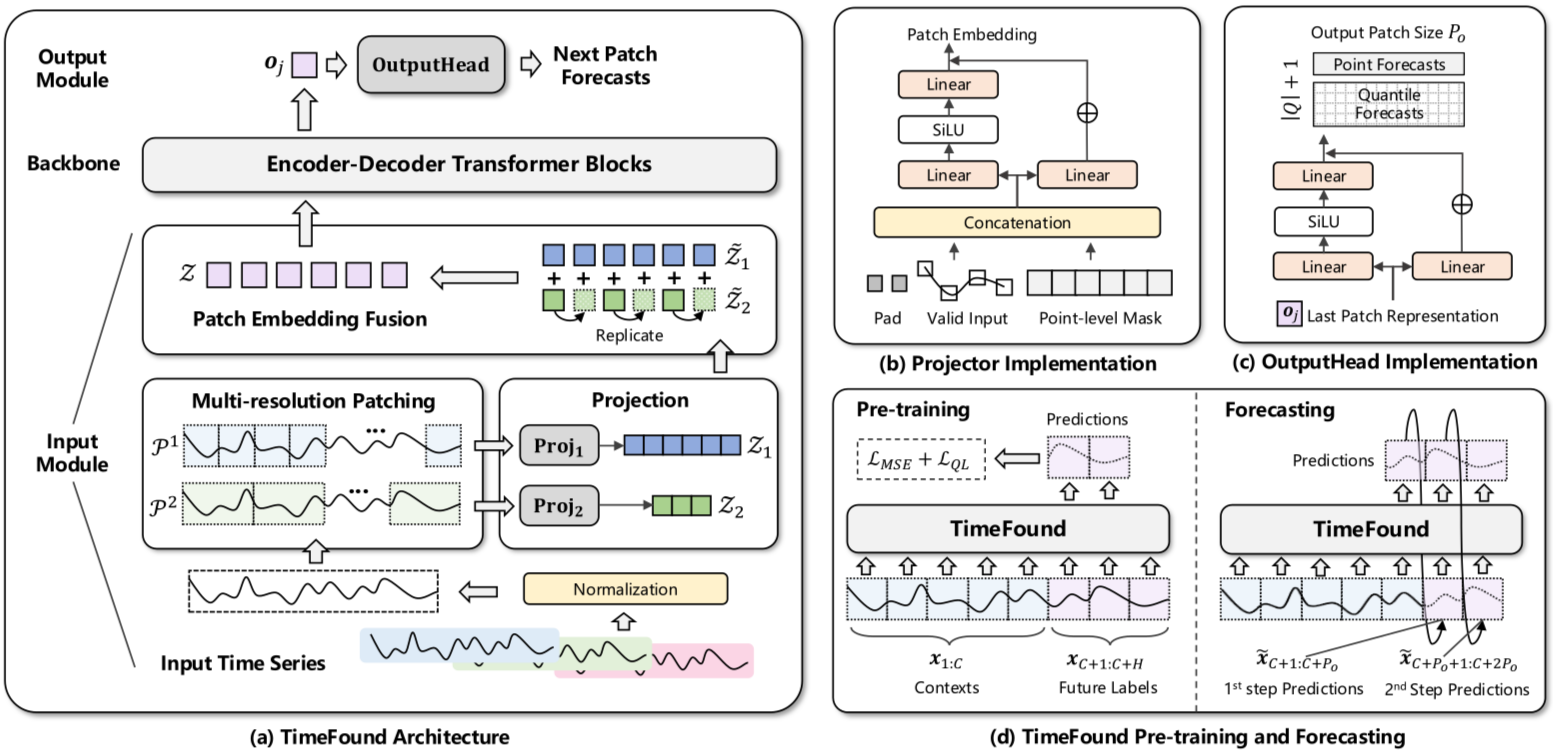

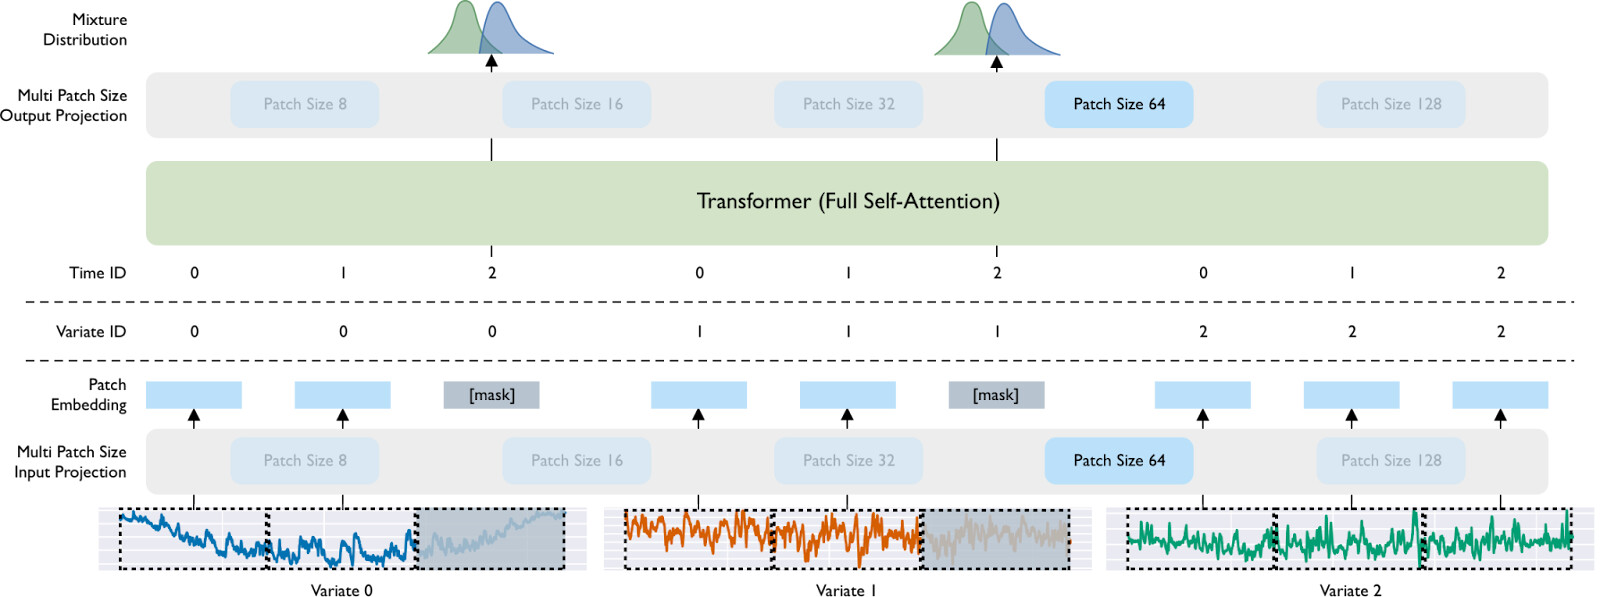

### 3. Foundation Model (시계열 파운데이션 모델)

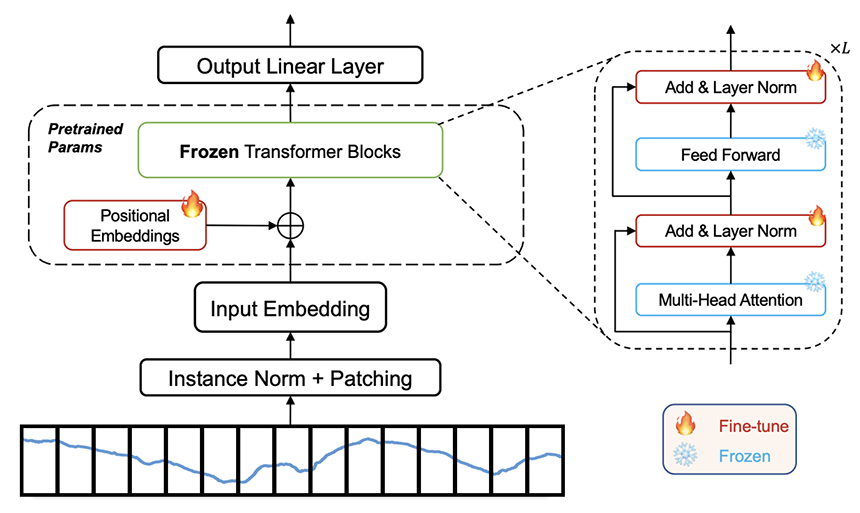

- 개념: 자연어처리의 GPT처럼, 엄청나게 방대한 시계열 데이터셋으로 사전 학습(Pre-training)을 마친 거대 모델. (TimeGPT, Chronos, MOIRAI 등)
- 특징 및 장점
  - Zero-shot Forecasting: 내 데이터로 별도 학습을 안 시켜도, 그냥 넣으면 바로 미래를 예측해줌.
  - 일반화 능력: 특정 도메인(예: 금융) 데이터만 학습한 게 아니라 다양한 데이터를 봐왔기 때문에, 데이터 양이 적거나 퀄리티가 낮은 상황에서도 통계 모델보다 훨씬 똑똑하게 추론함.
  - 기존에는 "삼성전자 주가 모델"을 따로 만들어야 했지만, 이제는 "범용 시계열 AI"가 삼성전자 차트를 보고 바로 다음을 맞히는 식.

## 감사합니다! 🐶🐶🐶